# DSCI 521: Methods for analysis and interpretation <br> Chapter 3: Exploratory data analysis and visualization

## 3.0 What is Exploratory Data Analysis (EDA)?

[Thanks Wikipedia!](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

> In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

In a very real way, EDA is at the heart of data science. This is primarily due to the flipped nature of data science's scientific method in which data often exist before an experiment with which said data is well defined. However, given the non-linear nature of our scientific method it's arguable that there are two primary goals/outcomes for EDA:

1. Evaluating the integrity of a data set to guide data acquisition and pre-processing.
    + Oftentimes, EDA will result in the reformulation of data collection methods, or the decision to collect different data.
2. Forming expectations and an intution for the usefulness and potential application of a dataset.
    + Oftentimes, EDA will result in the generation of a hypothesis, and plan for a model or experiment.

### 3.0.1 What Methods are Used for EDA?
In general, EDA should provide you with a broad sense of what your data set contains. This sort of a big picture is ordinarily obtained through one of:
+ summarization: through measures of commonality, centrality, variation, association, and regularity; or
+ visualization: through succicnt and intuitive representations that allow you to see all of the data.

We'll explore methods for each of these in turn.

### 3.0.2 A Caveat: Communication
While EDA might be focused on internal matters and progressing a project forward, its tools often serve an addition purpose for data science: __communication__. Summarization and visualization not only allow us to form an intuition about what our data can do, they allow us to succicntly describe and/or exhibit specific knowledge about the project we are working on to other who might not have the same experience with it. So, as with code documentation it's always important to think about how summarizations and visualization (especially) can be made pretty, precise, and digestible for outside audiences.

## 3.1 Summarization Methods
### 3.1.1 Commonality and Sorting
One of the most straightforward ways to get in idea for the big features at play in a data set is to ask the question

> "what occurs most frequently?"

We'll refer to this as commonality, with the most most common thing being the _mode_. Commonality can come up in a few different ways (see histograms below), but the simplest scenario to think of it is probably in the case of categorical or discrete variables, i.e., in the case of occurances that you can count. Reverse sorting (high to low), is also referred to as _ranking_. 

#### 3.1.1.1 Using the `sorted()` function
The canonical way to sort an iterable object in Python is with the `sorted()` function. Let see what `sorted()` can do:

In [1]:
## make some data to sort
list_of_numbers = [8, 6, 7, 5, 3, 0, 9]

## by default, sorted is ascending
print(sorted(list_of_numbers), '\n')

## reverse=True make the sort ascend
print(sorted(list_of_numbers, reverse = True), '\n')

## you can also sort string alphabetically
a_string = "If you sort this string it won't be readable!"
print(sorted(a_string), '\n')

[0, 3, 5, 6, 7, 8, 9] 

[9, 8, 7, 6, 5, 3, 0] 

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '!', "'", 'I', 'a', 'a', 'b', 'b', 'd', 'e', 'e', 'e', 'f', 'g', 'h', 'i', 'i', 'i', 'l', 'n', 'n', 'o', 'o', 'o', 'r', 'r', 'r', 's', 's', 's', 't', 't', 't', 't', 't', 'u', 'w', 'y'] 



A list of tuples automatically sorts by first elements; ties are then resolved by subsequent elements, i.e., 'columns':

In [2]:
## make some data to sort
list_of_tuples = [
    (8, "g"), (6, "a"), (7, "f"), (5, "d"), 
    (3, "k"), (0, "t"), (9, "x"), (8,  "f")
]

print(sorted(list_of_tuples))

[(0, 't'), (3, 'k'), (5, 'd'), (6, 'a'), (7, 'f'), (8, 'f'), (8, 'g'), (9, 'x')]


Perhaps most importantly, you can use lambda functions to sort by a transformation, for example the second 'column':

In [3]:
## sort by the second element of a tuple with a lambda function
print(sorted(list_of_tuples, key = lambda x: x[1]))

[(6, 'a'), (5, 'd'), (7, 'f'), (8, 'f'), (8, 'g'), (3, 'k'), (0, 't'), (9, 'x')]


#### 3.1.1.2 Exercise: modifying a sort order
Use the `key` argument and a lambda function to sort the `list_of_tuples` object primarily by the second (string) column, and secondarily by the first (integer) column.

In [4]:
## code here

#### 3.1.1.3 Finding the most common word
This can be a simple first step to seeing what a document is about, and also usually figures into the creating of a word cloud. Here, to make things simple we'll use the `Counter()` object type to count up words and do a `.most_common()` sort method.

In [5]:
import re
from collections import Counter

## some data
above_paragraph = "We'll refer to this as commonality. Commonality can come up in a few different ways (see histograms, below), but the simplest scenario to think of it is probably in the case of categorical or discrete variables, i.e., in the case of occurances that you can count. In fact, we've already done this for homework the case of the Indego bike-share data, figuring out which bikes were rented out the greatest number of times. This is also referred to as _ranking_. To run with an example, let's count the words in this paragraph and figure out which are the most common with the `sorted()` function."

## split the data into a list of "words"
words = re.split(" ", above_paragraph)

## initialize a Counter()
word_counts = Counter()
for word in words:
    word_counts[word] += 1
    
## .most_common() is a built-in method of Counter()
## that provides a tuple of the (object, count) by commonality
for word, count in word_counts.most_common()[0:10]:
    print(word, count)

the 9
of 5
in 4
to 3
this 3
case 3
out 3
as 2
can 2
is 2


### 3.1.2 Centrality
Centrality has a similar feel to commonality as a summarization method, but has more to do with numeric data. There are actually a number of ways to measure the centrality of a so-called _distribution_ of numbers. 

#### 3.1.2.1 Averages
The way you're probably most used to finding the central tendency of a collection of $n$ numbers, $x_1, \cdots, x_n$ is called the arithmetic mean:
$$\overline{x}_a = \frac{1}{n}\sum_{i=1}^nx_i$$

As it turns out, the arithmetic mean is not the only mean out there. There are actually three Pythagorean means:

![means](img/means.png)

These other two means are generally used less frequently than the arithmetic "average", but have their applications. The geometric mean:
$$\overline{x}_g = \sqrt[n]{\prod_{i=1}^nx_i}$$

is most commonly used for quantities that might get multiplied together, like probabilities, but can't accept negative values!

Finally, there's the harmonic mean:
$$\overline{x}_h = \frac{n}{\sum_{i=1}^n\frac{1}{x_i}},$$

which is commonly applied to rates, but can't accept non-positive values! For a little more intuition on when to apply the different means, there's a good post about it here:

+ https://betterexplained.com/articles/how-to-analyze-data-using-the-average/

Working with data on baseball player heights and weights, here's a few ways to compute averages:

In [6]:
## some modules to help with averages
import numpy as np
import scipy.stats
import pandas as pd

baseball_data = pd.read_csv(
    filepath_or_buffer= "data/baseball_heightweight.csv", 
    sep = ",",
    header = 0
)

## calculate arithmetic mean with numpy
print(np.mean(baseball_data["Height"]), '\n')

## calculate the geometric mean with scipy
print(scipy.stats.gmean(baseball_data["Height"]), '\n')

## calculate the harmonic mean with scipy
print(scipy.stats.hmean(baseball_data["Height"]), '\n')

73.6972920696325 

73.66137523137577 

73.62556530448495 



#### 3.1.2.2 Which average actually gets us the 'center'?
The answer is 'it depends', both on what the data represent, and on how they are distributed. Notice that when they are defined the above means always stick to the inequality:

$$x_h \leq x_g \leq x_a$$

However, sometimes none of these are really at the center! All of the means have some sensitivity to _outliers_, which are values that are wildly large or small. Well, very often another measure called the _median_ is better.

#### 3.1.2.3 Medians
A completely different measure of the center of a distribution of numbers is called the _median_, which is the middle number in a sorted list (or average of the two middle, if there are an even number of them). Most importantly, changing the largest number in a data set to something astronomically large won't change the median at all!

Believe it or not, this&mdash;because of sorting&mdash;is slightly more complex to compute than any of the means, especially for a large data set. However, we can do it easily in `NumPy`:

In [7]:
print(np.median(baseball_data["Height"]))

74.0


### 3.1.3 Variation
Here, instead of a high-level picture of where the middle is, we're interested in knowing how densely packed or spread out data are. As usual, there are a few ways to accomplish this.

#### 3.1.3.1 Percentiles
As it turns out, medians are just an instance of a more general kind of analysis called _percentiles_. For the median (the 50th percentile), 50% of the falls on either side. This is why it is thought of as a kind of middle. However, the concept generalizes to provide an idea of where, say, the middle 50%, a.k.a the _interquartile range_ (IQR), of your data are located. In particular:

+ The $p$th percentile: is the number below which $p$-percent of the data fall

To take percentiles we can once again use `NumPy`:

In [8]:
## find the 50th percentile (median)
print(np.percentile(baseball_data["Height"], 50), '\n')

## find the 25th and 75th percentiles 
## (first and third quartiles)
## This is the middle fifty-percent
print(np.percentile(baseball_data["Height"], [25, 75]))

74.0 

[72. 75.]


#### 3.1.3.2 Exercise: percentiles
Compute all deciles ($10$-increment percentiles) for the baseball player heights. How do these values space apart, are the locations evenly spaced? 

In [9]:
## code here

#### 3.1.3.3 Variance
It should be no surpise that the quantitative concept of 'variance' falls under our discussion of variation! We've talked about averages and measures of centrality, and that kind of thinking can also get you into a measure of spread. The variance is itself an average, but tells you the average squared distance of you data away from its average:
$$\sigma^2 = \frac{1}{n}\sum_{i=1}^n(x_i - \overline{x})^2$$

But wait, why this squared thing? Because the deviations inside of the square could otherwise cancel out! We want to know how far they usually are&mdash;a kind of distance. However this puts the variance out of the units of the original data. So if you want to use means for variance, we use something called the _standard deviation_.

The _standard deviation_ is simply the square root of the variance:
$$\sigma = \sqrt{\sigma^2}$$

Because this takes the square root of a square, it brings the measure back into the units of the original data, allowing for comparison. As it turns out, this brings the concept full circle into another (distance), but first let's look at how we easily compute standard deviation with `NumPy`:

In [10]:
## find the standard deviation
print(np.std(baseball_data["Height"]))

2.304703041620148


### 3.1.4 Distance and norms
As it turns out, when you put the standard deviation formula all together, i.e., with the square root, you're taking a special kind of distance. This is called the _Euclidean distance_, which is what we use to determine how far away two objects are by a straight line. 

#### 3.1.4.1 Computing Euclidean distance
Supposing we have two lists of numbers: $x = [x_1, \cdots, x_n]$ and $y = [y_1, \cdots, y_n]$, the Euclidean distance is:
$$d_E(x,y) = \sqrt{\sum_{i=1}^n(x_i - y_i)^2}$$

This makes the standard deviation the data's distance from a constant list of $\overline{x}'s$, divided by $\sqrt{n}$! Let's see how we can take distances using `numpy`:

In [11]:
## note: y has a NaN, let's filter it out!
baseball_data = baseball_data.dropna(axis = "rows")

## let's make some arrays to take distances
x = baseball_data["Height"]
y = baseball_data["Weight"]

## compute the distanace manually:
d = np.sqrt(sum((x - y) ** 2))
print(d)

4162.83509161725


#### 3.1.4.2 There's more than one way to compute distance!
Notions of distance depend on choices of _norm_, or, how one defines "big". In the previous, Euclidean case, big is defined as the square root of the sum of squared values:
$$\|x\|_2 = \sqrt{\sum_{i=1}^nx^2}$$

But an alternative, referred to as the _taxicab_ norm:
$$\|x\|_1 = \sum_{i=1}^n|x|$$

is just the sum of absolute values. This results in the taxicab distance:
$$d_T(x,y) = \sum_{i=1}^n|x_i - y_i|.$$

In [12]:
## compute the distnace manually:
d = sum(abs(x - y))
print(d)

132214.0


But why is it called the taxicab distance? Because it is the distance you would travel if you only took right turns to get anywhere, i.e., like on a street grid:

![taxi](img/taxicab_distance.png)

There are in fact many more norms and distnaces out there, but our discussion needs to move along into to another concept: association and similarity.

#### 3.1.4.3 Exercise: comparing player statistics
Represent each player in the baseball data as a (2-dimensional) pair of height/weight numbers. Use either of the Euclidean or taxicab distances on these pairs to determine which players are the 'closest' to one another in terms of build.

In [13]:
## code here

### 3.1.5 Similarity
One of the things that we might like to do with a distance measure is compare two lists of data to see how related they are. However, "far apart"—which is what distance tells us&mdash;doesn't generally help to figure out if two pieces of data are related (association), or if one distance comparison is a "closer" match than another. This is where _similarity measures_ come in, which are like distance metrics, but can produce numbers between $-1$ and $1$, or $0$ and $1$ if they are normalized. Note: a similarity measure outputs $1$ two lists are the same, while a _dissimilarity_ measure outputs $0$. 

#### 3.1.5.1 Generalizable, norm-based similarity
An easy way to produce a normalized similarity from distance is to use the triangle inequality:

$$d(x,y) = \|x - y\| \leq \|x\| + \|y\|$$

to get:

$$sim(x,y) = \frac{d(x,y)}{\|x\| + \|y\|}$$

Note that any of these normalized similarity measures have high numbers indicating coming from greater distances. Thus they are actually all _dissimilarity_ measures. Let's try this out with our Euclidean distance:

In [14]:
## compute usual distanace manually:
d = np.sqrt(sum((x - y) ** 2))
print(d, '\n')

## now compute the similarity manually:
sim = np.sqrt(sum((x - y) ** 2)) / (np.sqrt(sum(x**2)) + np.sqrt(sum(y ** 2)))
print(sim)

4162.83509161725 

0.4684077697353937


#### 3.1.5.2 Similarity for categorical data
This is done with sets, using the intersection and union operations. Specifically, the size of an intersection of a pair of sets divided by the size of the pairs union is called the _Jaccard similarity_. Here, higher numbers indicate the sets have more in common, making it a true similarity measure.

In [15]:
## First make two sets
set_1 = {"this", "that", "and", "the", "other"}
set_2 = {"just", "that", "and", "the", "other"}

## compute the Jaccard similarity:
print(len(set_1.intersection(set_2)) / len(set_1.union(set_2)))

0.6666666666666666


#### 3.1.5.3 Cosine similarity
One common example is called the cosine similarity:
$$ sim(x,y) = \frac{\sum_{i=1}^n{x_iy_i}} { \sqrt{\sum_{i=1}^nx_i^2} \sqrt{\sum_{i=1}^ny_i^2} }, $$

which is all about angles and inner products. In fact, it gets you a generalization of the angle between two lines. This means that smaller angles are less similar, making it a true similarity measure. Here's an example:

In [16]:
## compute the similarity manually:
sim = sum(x * y) / (np.sqrt(sum(x ** 2)) * np.sqrt(sum(y ** 2)))
print(sim)

0.9958669705643208


### 3.1.6 Association
Similarity is still different from association! Instead of similarity, which measures relative closeness, _association_ measures determine if two sets of data rise and fall together. A very common association technique is called _correlation_, of which there are several varieties. 

#### 3.1.6.1 Linear association
The most common correlation measure is probably the Pearson (linear) correlation, which says how close the relationship between $x$ and $y$ is to being a line. As it turns out, Pearson's correlation is closely related to both the Euclidean distance and the cosine similarity:

$$ cor(x,y) = \frac{\sum_{i=1}^n{(x_i-\overline{x})(y_i-\overline{y})}} { \sqrt{\sum_{i=1}^n(x_i-\overline{x})^2} \sqrt{\sum_{i=1}^n(y_i-\overline{y})^2} }. $$

In fact, it's just equal to the cosine similarity of data that are standardized (see __Chapter 2__)! Here's a great graphic showing how Pearson's correlation will behave differently for different relationships:

![cor](img/Correlation_examples.png)

Even though Pearson's correlation could be computed from the cosine similarity computation we've already seen, we can just use `SciPy`'s built in to get there:

In [17]:
## compute the pearson correlation
## Note the second output is a p-value;
## we'll talk about this in a few classes
print(scipy.stats.pearsonr(x, y))

(0.5318858630270029, 1.6552817721654723e-76)


#### 3.1.6.2 Monotonic association
What if we don't care about _linear_ relationships, but more generally ones for which $y$ either increases or decreases with $x$? One of the biggest assumptions with Pearson's correlation is linearity. This is a pretty strict requirement, and a different type of correlation doesn't care what kind of relationship two pieces of data have, just if they increase/decrease with each other. This is called the Spearman rank correlation, and is computed the same way as Pearson's correlation, but using _ranks_ of $x$ values in place of $x$ values. Computation is quite similar to Pearson:

In [18]:
import scipy.stats
## compute the spearman correlation
## Note the second output is a p-value;
## we'll talk about this in a few classes
print(scipy.stats.spearmanr(x, y))

SpearmanrResult(correlation=0.523509645759292, pvalue=9.306245125633659e-74)


Here's a good conceptualization of the difference in how these correlations behave:

![spearman](img/Spearman_Pearson.png)

### 3.1.7 Outliers
Sometimes, a few (hopefully) of the numbers in your data might have gotten messed up and not belong. These numbers might have arisen from instrument error, or who knows what. So, when it is okay throw out a number from a data set? In general, this concept and such a number is referred to as an _outlier_. While there is no definite, accepted way to define outliers in a data set, rules of thumb are commonly set according to measure of centrality and spread. Here's two ways to measure outliers:

+ All points 1.5 IQRs below the first or below the third quartile
+ All points 3 standard deviations ($\sigma$s) away from the mean

#### 3.1.7.1 Computing IQR outliers
To perform this kind of outlier computation we have to 1) determine the IQR and its size, and 2) filter values according to a scaling of this region. As it turns out, dataframe objects and boolean masks are very convenient here! 

In [19]:
## Let's look for 1.5 IQR outliers!
## first, computer the IQR
IQR = np.percentile(baseball_data["Height"], [25, 75])
print(IQR, '\n')

## next, figure out how big the IQR is
IQR_size = IQR[1] - IQR[0]
print(IQR_size, '\n')

## filter the heights by a boolean mask to get outliers
low_outliers = baseball_data[
    baseball_data["Height"] < IQR[0] - IQR_size * 1.5
]["Height"]

high_outliers = baseball_data[
    baseball_data["Height"] > IQR[1] + IQR_size * 1.5
]["Height"]

print(low_outliers, '\n')

print(high_outliers)

[72. 75.] 

3.0 

1007    67
1008    67
Name: Height, dtype: int64 

62     81
124    80
282    80
366    80
507    80
573    82
677    80
781    81
881    82
928    83
Name: Height, dtype: int64


#### 3.1.7.2 Exercise: computing standard deviation-based outliers
Modify the above code to implement the outlier detection that defines outliers by as all points at least $3$ standard deviations ($\sigma$s) away from the mean.

In [20]:
## code here

## 3.2 Common visualization methods
We've gone through all of these materials on summarization first because many of these actually appear as concepts and quantities that underpin what gets represented in visualization. This will be very apparent in our first type of plot, which is hugely emblematic of EDA: the box and whiskers plot. However, before we begin, it's important to note that just as with summarization, visualization builds up from one variable/dimension to multiples in comparison.

### 3.2.0 Getting started with `matplotlib`
Before we can actually begin with making visualizations, we'll take a moment to discuss Python's primary visualization functionality. The module for this is called `matplotlib`. However, `matplotlib` visualization don't look that great straight out of the box. In these notes, I'll be sharing some of the tips and tricks I've developed for making `matplotlib` figures look decent, but there are certainly other ways to go about this! For example, there are many hyper-specific and refined visualization tools specially built into `pandas` (though still `matplotlib`, underneath). I won't be going through these, but the basics described herein could get you there with a bit of work.

#### 3.2.0.1 One more note
Part of the magic of Jupyter notebooks is their capacity to render matplotlib visualizations alongside code and markdown. This does not happen natively, so if you want your visualizations to show up inside of your notebooks, first execute the Jupyter "magic" command:

In [21]:
%matplotlib inline

Also, don't forget to import matplotlib's pyplot!

In [22]:
from matplotlib import pyplot as plt

### 3.2.1 Box and Whiskers Plots
Box and whiskers are emblematic of EDA, because they were first proposed by the statistican John Tukey, who promoted EDA early on! Moreover, they are an encapsulation of several descriptive summary statistics for numerical data:

+ centrality: through the IQR (the box) and median (central box-line)
+ spread: via whiskers, commonly extending out to farthest points within 1.5 IQR-lengths past the limits of the box (first and third quartiles)
+ outliers: extreme points past the whiskers are shown as outliers points

Note: other box plots might use different standards for the limits of whiskers and their resulting outlier points. It's all up to how you execute the visualization, and `matplotlib` provides control for this. In general, for the down and dirty specifics of `matplotlib` visualizations, consult the docs:

+ https://matplotlib.org/api/pyplot_api.html

To make our bar plot we can just use the `plt.boxplot` method:

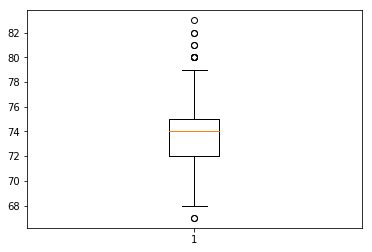

In [23]:
## make a box plot of one data dimension
_ = plt.boxplot(baseball_data["Height"])

#### 3.2.1.2 Making things look nice
Don't you think this picture's a bit... ugly? At the very least let's add a label on the x-axis, control the figure dimensions, and add a title to make things a bit more interpretable:

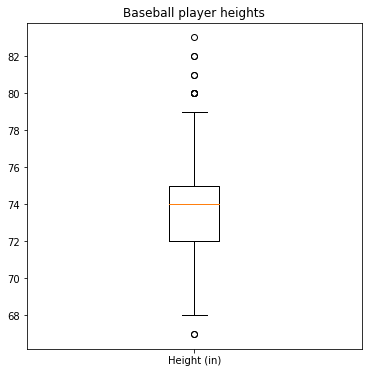

In [24]:
## Initialize a 6 x 6in figure
fig = plt.figure(figsize = (6, 6))

## Make the box plot
_ = plt.boxplot(baseball_data["Height"], labels = ["Height (in)"])

## Set the title
_ = plt.title("Baseball player heights")

But there's usually more optimization to do&mdash;the title, axis ticks and labels are all a little small!

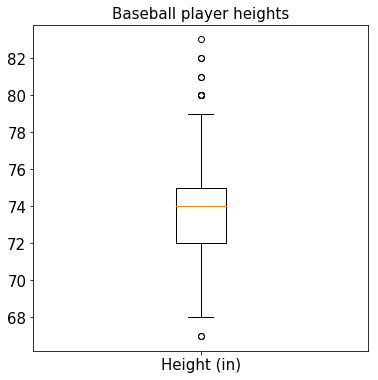

In [25]:
## Initialize a 6 x 6in figure
fig = plt.figure(figsize = (6, 6))

## Make the box plot
_ = plt.boxplot(
    baseball_data["Height"], 
    labels = ["Height (in)"]
)

## adjust the tick and label font size
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Baseball player heights", fontsize = 15)

#### 3.2.1.3 Side by side box and whiskers
It's often helpful to see box plots next to one another. This can afford a nice distributional comparison and is likewise made convenient by `pyplot`:

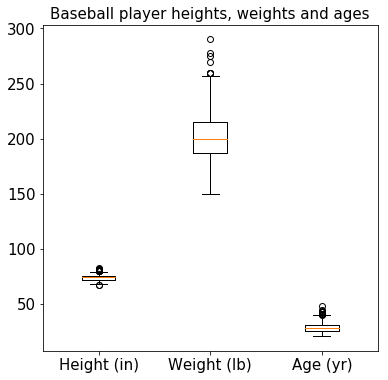

In [26]:
## Initialize a 6 x 6in figure
fig = plt.figure(figsize = (6, 6))

## Make the box plot
_ = plt.boxplot(
    [
        baseball_data["Height"], 
        baseball_data["Weight"], 
        baseball_data["Age"]
    ], 
    labels = [
        "Height (in)", 
        "Weight (lb)", 
        "Age (yr)"
    ]
)

## adjust the tick and label font size
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Baseball player heights, weights and ages", fontsize = 15)

#### 3.2.1.4 Exercise: standardizing data for comparison
Use the standardization technique from __Section 2.0.1__ to transform the height, weight, and age columns into numerically comparable quantities and vizualize them in a side-by-side boxplot. How do they appear to differ, now?

In [27]:
## code here

### 3.2.2 Bar Charts
Bar plots represent discrete quantities or quantities of categories next to one another. To explore, let's first count up the number of different numbers of players in each position type, and display them in a barplot.

In [28]:
from collections import Counter

## initialize a counter for the positions
positions = Counter()

## loop over rows to count up the positions
for ix, row in baseball_data.iterrows():
    positions[row["Position"]] += 1

In [29]:
list(positions.keys())

['Catcher',
 'First_Baseman',
 'Second_Baseman',
 'Shortstop',
 'Third_Baseman',
 'Outfielder',
 'Designated_Hitter',
 'Starting_Pitcher',
 'Relief_Pitcher']

After a little pre-processing we're ready to plot using `plt.bar()`!

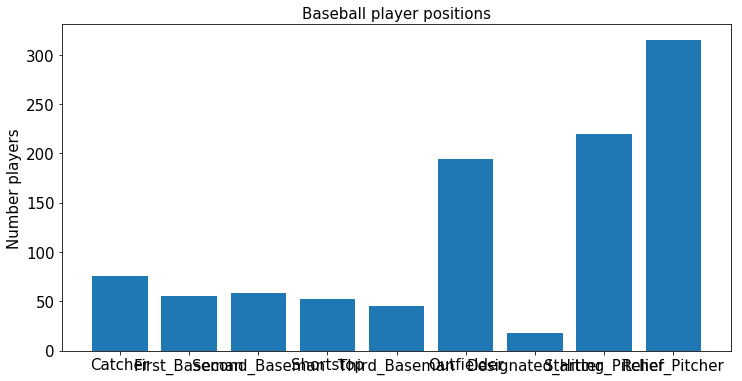

In [30]:
## It's width by height, so let's make this one wide!
bar_fig = plt.figure(figsize = (12, 6))
    
## note the plot.bar() function takes an x-positon for bars
## in the event that data are not categorical,
## but we'll just use discrete positioning, i.e., left = [1,2,3, ...]
## to space out the bars
_  = plt.bar(
    x = range(1, len(positions) + 1),
    height = list(positions.values()),
    tick_label = list(positions.keys())
)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Baseball player positions", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Number players", fontsize = 15)

Again, it's important to make things look nice. Since the labels are colliding, let's rotate them and replace the underscores with newlines!

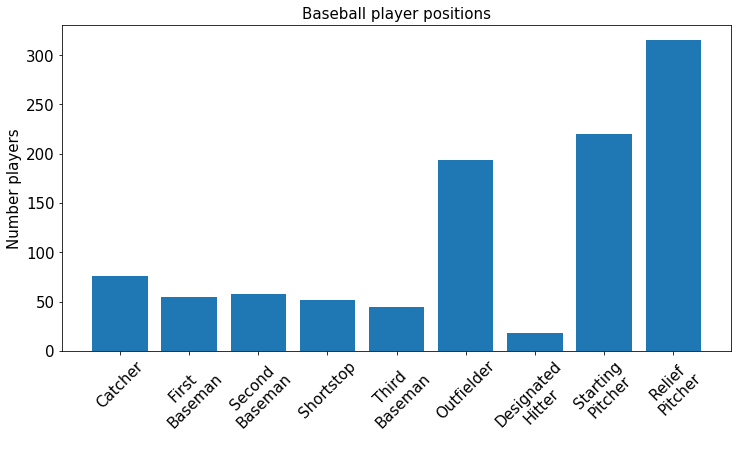

In [31]:
## we need regular expressions to fix the labels!
import re

## a little more pre-processing to fix the labels
labels = positions.keys()
labels = [
    re.sub("_", "\n",label)
    for label in labels
]

## It's width by height, so let's make this one wide!
bar_fig = plt.figure(figsize = (12, 6))
    
## note the plot.bar() function takes an x-positon for bars
## in the event that data are not categorical,
## but we'll just use discrete positioning, i.e., left = [1,2,3, ...]
## to space out the bars
_  = plt.bar(
    x = range(1, len(positions) + 1),
    height = list(positions.values()),
    tick_label = labels
)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Baseball player positions", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Number players", fontsize = 15)

## rotate the x-tick labels
_ = plt.xticks(rotation = 45)

#### 3.2.2.1 Aside: what about pie charts?
While it's true, pie charts represent perhaps even more information as a categorical bar plot (wholeness) they are challenged by inerpretability. Rather than displaying a comparison of quantities via heights, pie charts rely on potentially two quantitative concepts that challenge human intuition:

+ angle: the breadth of the wedge
+ area: the overall size of the wedge

While either of a wedge's angle or area is sufficient to represent differences in quantity, these representations and significantly more complex than bar height, which can be compared by simply placing a ruler or drawing a horizontal line. When you want to compare quantities use bar charts!

#### 3.2.2.2 Exercise: a sorted bar plot
Utilize the `sorted()` function from __Sec. 3.1.1__ to rebuild the barplot visualization of baseball position, but with the size of bars decreasing from left to right.

In [32]:
## code here

### 3.2.3 Histograms
While bar plots are very general, allowing the user to control the exact heights and positions of bars, histograms a more specific kind of bar plot intended to represent density in 1-dimensional data. In other words, histograms provide information on centrality and variation, without directing the eye to a single quantity, like mean, median, or standard deviation. However, these values can be plotted on top.

#### 3.2.3.1 A caveat: binning
It's important to note that in order to represent density, histograms must collect data into bins. The question is:

+ how are the bin boundaries computed?

One common methods is:

+ a fixed number of equally-spaced bins

However, the number of bins and their spacing are parameters that have to be set. This can be done with the `matplotlib` `hist` function, but there are defaults.

Let's make a histogram of the heights.

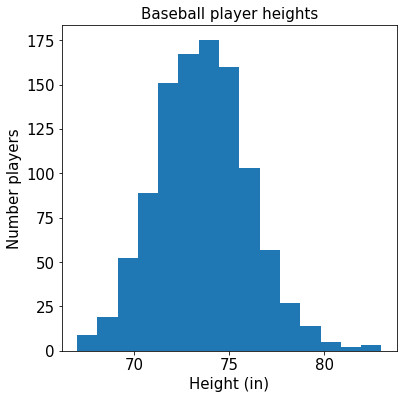

In [33]:
## set the figure dimensions
hist_fig = plt.figure(figsize = (6, 6))
    
## make a histogram and set the number of bins to 15
_  = plt.hist(baseball_data["Height"], bins = 15)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Baseball player heights", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Number players", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Height (in)", fontsize = 15)



#### 3.2.3.2 Exercise: binning
Repeat the above visualization using a few different bin sizes. Which choice appears to evoke the smoothest shape in the hisogram? What happens when there are too many or too few bins?

In [34]:
## code here

#### 3.2.3.3 Normalized histograms

We'll be discussing normalization a bit more when we discuss probability, but here it means we're creating some sort of a probabilistic representation&mdash;for now, a collection of non-negative numbers that 'adds up' to 1. However, a normalized histogram's bar heights do not add up to one!

This is a common misconception. Distribution normalization is all about _area_. So it's actually the bar areas that add up to one. In other words, you would have to sum the products of the widths and heights. So, don't be surprised when you see a normalized histogram whose bar heights go above 1; this is just because the bars are very skinny!

/usr/local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


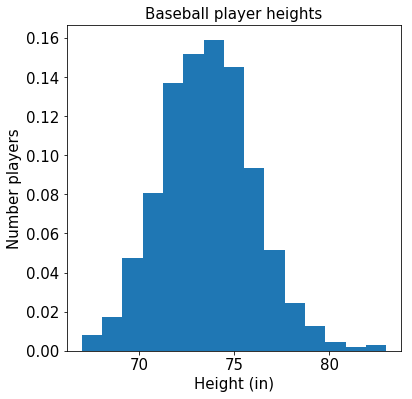

In [35]:
## set the figure dimensions
hist_fig = plt.figure(figsize = (6, 6))
    
## make a histogram and set the number of bins to 15
_  = plt.hist(baseball_data["Height"], bins = 15, normed = True)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Baseball player heights", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Number players", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Height (in)", fontsize = 15)

#### 3.2.3.4 Comparing histograms

What if we want to compare histogram of the baseball player heights and weights? Well, heights and weights are pretty different numbers, so the first thing we'll have to do is standardize out the data (as in __Sec. 2.0.1__). Once we do this, we can make two histograms that are different colors.

In [36]:
## pre-processing: standardize the heights and weights
s_height = baseball_data["Height"] - np.mean(baseball_data["Height"])
s_height = s_height / np.std(baseball_data["Height"])

s_weight = baseball_data["Weight"] - np.mean(baseball_data["Weight"])
s_weight = s_weight / np.std(baseball_data["Weight"])

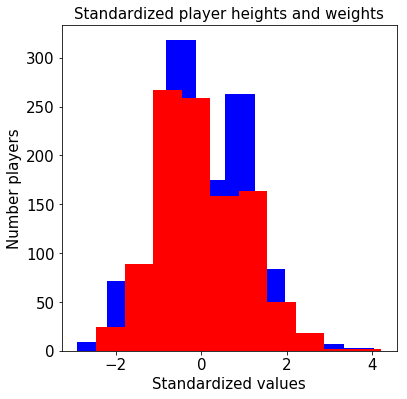

In [37]:
## set the figure dimensions
hist_fig = plt.figure(figsize = (6, 6))
    
## make two histogram that ar different colors
_  = plt.hist(s_height, color = "blue")
_  = plt.hist(s_weight, color = "red")

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Standardized player heights and weights", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Number players", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Standardized values", fontsize = 15)

Note that since the colors are 'solid' it's hard to see what's going on where they overlap.

Well, images&mdash;at least, pngs&mdash;have an extra byte devoted to transparency in each pixel. We can use transparency in a histogram to display overlap, too. Right now, this would make our overlapping region purple. However it's a little tricky for some people to see color. Thus, we might want to use shades of gray vs red, just to be safe.

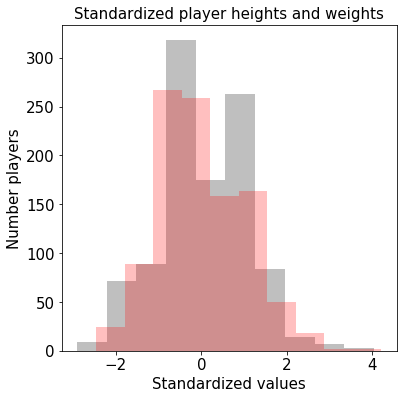

In [38]:
## set the figure dimensions
hist_fig = plt.figure(figsize = (6, 6))
    
## make two histogram that are different colors
## and both have alpha = 0.25 (transparency)
_  = plt.hist(s_height, color = "black", alpha = 0.25)
_  = plt.hist(s_weight, color = "red", alpha = 0.25)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Standardized player heights and weights", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Number players", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Standardized values", fontsize = 15)

#### 3.2.3.5 Adding a legend
But wait, which histogram is which??? Right, even though you can see the code, the reader doesn't know what red vs. black indicates! So, it looks like we're going to need a legend! Legends are a little tricky in Python. You have to put a label in each separate visualization command, and then call the legend command afterwords. But it's much easier to read!

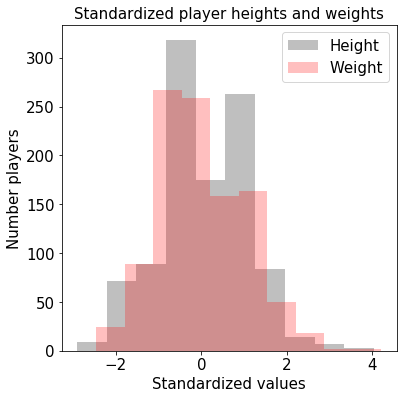

In [39]:
## set the figure dimensions
hist_fig = plt.figure(figsize = (6, 6))
    
## make two histogram that are different colors
## and both have alpha = 0.25 (transparency)
_  = plt.hist(s_height, color = "black", alpha = 0.25, label = "Height")
_  = plt.hist(s_weight, color = "red", alpha = 0.25, label = "Weight")

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Standardized player heights and weights", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Number players", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Standardized values", fontsize = 15)

## make the legend
_ = plt.legend(fontsize = 15)

### 3.2.4 Scatter Plots
Okay, so we're starting to make visual comparisons of our data. It looks like the heights might be a bit more spread out than the weights from our histograms, but we might want to know if heights and weights are related to each other, player-by-player. This is where a scatter, or point plot comes in handy. This is now, offically, a two-dimensional plot! Note: for our scatter plot it won't matter if we use standardized data! So, let's just use the data in original units for interpretability.

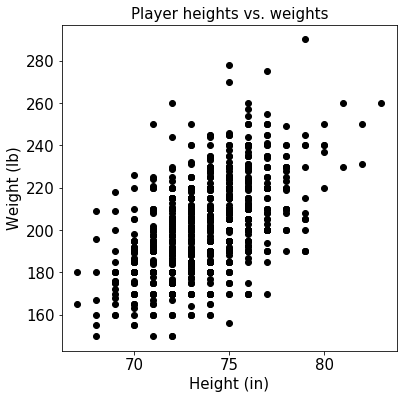

In [40]:
## set the figure dimensions
scat_fig = plt.figure(figsize = (6, 6))
    
## make a scatter plot
_  = plt.scatter(
    baseball_data["Height"],baseball_data["Weight"],
    color = "black"
)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Player heights vs. weights", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Weight (lb)", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Height (in)", fontsize = 15)

#### 3.2.4.1 Density
Scatter plot interpretation is all about density. Above, the dots are mostly on top of one another. Two things we can easily do are:

1. make the dots smaller
2. add 'alpha' (transparency) to convey density

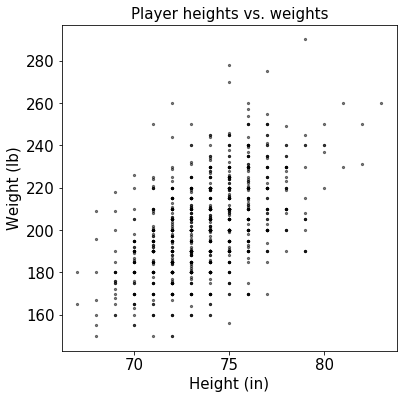

In [41]:
## set the figure dimensions
scat_fig = plt.figure(figsize = (6, 6))
    
## make a scatter plot
_  = plt.scatter(
    baseball_data["Height"],baseball_data["Weight"],
    color = "black", s = 5, alpha = 0.5
)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Player heights vs. weights", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Weight (lb)", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Height (in)", fontsize = 15)

#### 3.2.4.1 2-dimensional binning: an alternative to scatter plot density
Unlike histograms, which use bar height to represent density, two dimensions require color to represent density. However, just like histograms there has to be some kind of binning. An interesting way to do this is with a hexagonal binning. It's pretty much as straightforward as a histogram, but this means that we need to be conscious of the number of bins (gridsize) we use.

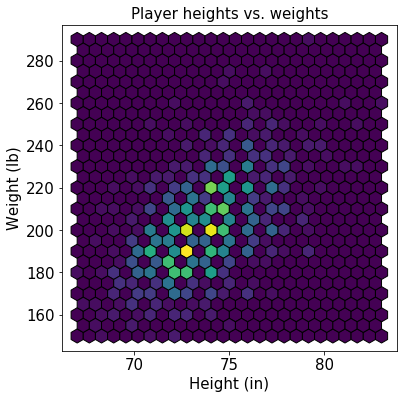

In [42]:
## set the figure dimensions
hexb_fig = plt.figure(figsize = (6, 6))
    
## make a hexbin plot
_  = plt.hexbin(
    baseball_data["Height"],baseball_data["Weight"], color = "black",
    gridsize = 25
)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Player heights vs. weights", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Weight (lb)", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Height (in)", fontsize = 15)

#### 3.2.4.1 Color maps
The default _color map_, or, scale of colors used, isn't so easy to understand, especially for the color-challenged. Here's a some discussion of maps:

+ https://matplotlib.org/users/colormaps.html

Let's just use black-to-white for simplicity:

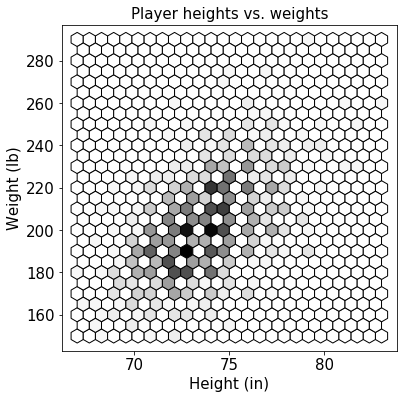

In [43]:
## set the figure dimensions
hexb_fig = plt.figure(figsize = (6, 6))
    
## make a hexbin plot
_  = plt.hexbin(
    baseball_data["Height"],baseball_data["Weight"], color = "black",
    gridsize = 25, cmap = "binary"
)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Player heights vs. weights", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Weight (lb)", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Height (in)", fontsize = 15)

#### 3.2.4.2 Exhibiting a relationship
So, do height and weight have a relationship? Well, maybe, but it's fuzzy. Just how fuzzy is something we've already been thinking about. We found some correlations—Pearson, Spearman—between height and weight, and a legend is actually a great place to display them. Let's see how we can get some more interesting information into a legend:

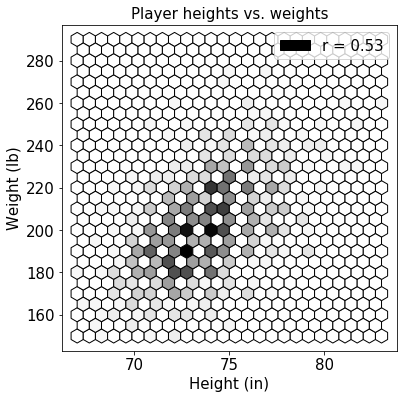

In [44]:
## set the figure dimensions
hexb_fig = plt.figure(figsize = (6, 6))

## To put a (Pearson) correlation into a figure
## we must process the relationship between the two
## variables and save the output as a string:

cor = scipy.stats.pearsonr(
    baseball_data["Height"],baseball_data["Weight"]
)[0]

## for clarity, it's probably best to round
## to a few decimal places, first
## but we should also label it as "r"
corstr = "r = " + str(round(cor, 2))
    
## make a hexbin plot
_  = plt.hexbin(
    baseball_data["Height"],baseball_data["Weight"], color = "black",
    gridsize = 25, cmap = "binary", label = corstr
)

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("Player heights vs. weights", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Weight (lb)", fontsize = 15)

## Set the y-label
_ = plt.xlabel("Height (in)", fontsize = 15)

## make a legend
_ = plt.legend(fontsize = 15)

### 3.2.5 Line Plots
Line plots require two dimensions of data, just like scatter plots, but there is one major difference:

+ the x-variable of a line plot must have an inherent order

So, while our baseball player's heights don't have a necessary meaningful order, _time_ does. Line plots for which time is the x-variable are referred to as _time series_. Let's look at some Apple stock data and see if we can plot the price changes as a time series. Note that if we want the dates to truly be numeric type objects that we can plot in order on the x-axis, they must be parsed as dates!!

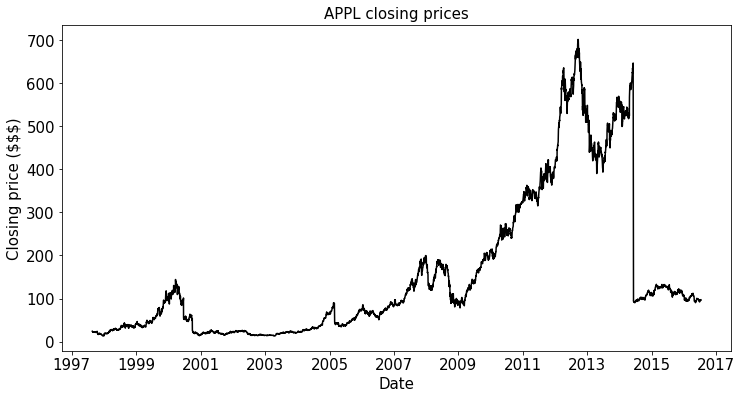

In [45]:
## This loads the csv file from disk
APPL = pd.read_csv(
    filepath_or_buffer = "./data/APPL.csv", sep = ",", 
    header=0, parse_dates = [0]
)

## set the figure dimensions
line_fig = plt.figure(figsize = (12, 6))
    
## make a line plot
_  = plt.plot(APPL["Date"],APPL["Close"], color = "black")

## Set the tick and label fontsize
plt.tick_params(labelsize = 15)

## Set the title
_ = plt.title("APPL closing prices", fontsize = 15)

## Set the y-label
_ = plt.ylabel("Closing price ($$$)", fontsize = 15)

## Set the x-label
_ = plt.xlabel("Date", fontsize = 15)

#### 3.2.5.1 Exercise: line charts
Make a line chartof the Apple stock above, except this time plot the daily price change as a a function of date.

In [46]:
## code here

#### 3.2.4.3 Exercise: combining visual elements
While it won't change the above correlation in any way, rebuild the density plot visualization from __Sec. 3.2.4.2__ using standardized height and weight values. Then, add to this visualization by plotting the line $y = x$. Discuss the stength of correlation and how drastically the density appears to fall out of alignment with this most basic linear relationship.

In [47]:
## code here

#### 3.2.7 Interactivity
So far we've gone through making a number of the basic visualizations. These are techniques that have all been out there for a while, and the big deal with data science now is the ease with which they can be produced. But coming back to what the point of visualization and summarization are:

+ intuitive communication and a big picture view.

These basic visualization techniques are really just the tip of the visualization iceberg. There are a ton of other highly-specialized ways to visualize information now, but on their own __these are all still static views of data__.

While a static view might allow you to inspect all of the data in a single or few dimensions, there's a problem: data are now big. Big meaning a lot, but perhaps more importantly here, _varietal_. Instead of just height or weight, etc., a data set like Project Gutenberg might enable you to build one visualization for each of 50,000 books! How would you represent all of these 50,000 visualization? How would you ever bother to make them all and would you want them to persist?

The answer to all of these questions is "no", make your visualizations _interactive_. Interactive visualization might mean having a dropdown menu or search bar to be able search through all 50,000 books to be able to temporarily generate the book-visualization of interest. Generally, interactive visualizations are web-based, and Python is not the best for web programming. However, it does have a library for this called `Bokeh`:

+ The docs: https://bokeh.pydata.org/en/latest/
+ The gallery: https://bokeh.pydata.org/en/latest/docs/gallery.html

We're not going to go through `Bokeh` here, because interactive visualization is really an in-depth topic unto itself. Moreover, the way Bokeh works is as an API for a more-natively web-based language: Javascript. Thus, the most established and native interactive visualization toolkit is actually a Javascript library called `d3.js`:

+ information: https://d3js.org/
+ gallery: https://github.com/d3/d3/wiki/Gallery

While `d3.js` is a Javascript library, perhaps the most fun examples to look at were produced by its creator, Mike Bostock, through his bl.ocks.org GitHub gist:

+ bl.ocks: https://bl.ocks.org/-/about/
+ Bostock's bl.ocks: https://bl.ocks.org/mbostock

Note: Mike Bostock was the graphics editor for The New York Times for years. He had a massive impact on the world of information visualization.